In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LeakyReLU, ELU, ReLU, GaussianNoise, Softmax
from keras.optimizers import SGD, Adam
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, TensorBoard
from keras.losses import MeanSquaredError, CategoricalCrossentropy

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 10, 8

Using TensorFlow backend.


In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_metrics(y_true, y_pred):
    print(f'Accuracy : {accuracy_score(y_true, y_pred):.2f}')
    print(f'Precision: {precision_score(y_true, y_pred, average = "macro"):.2f}')
    print(f'Recall   : {recall_score(y_true, y_pred, average = "macro"):.2f}')
    print(f'F1-score : {f1_score(y_true, y_pred, average = "macro"):.2f}')

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  2


## Exploring dataset a bit

Load the dataset

In [4]:
wine = load_wine()
print(wine.feature_names)
print(wine.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [5]:
X = wine.data
Y = wine.target
print(X.shape, Y.shape)

(178, 13) (178,)


Histogram of target values

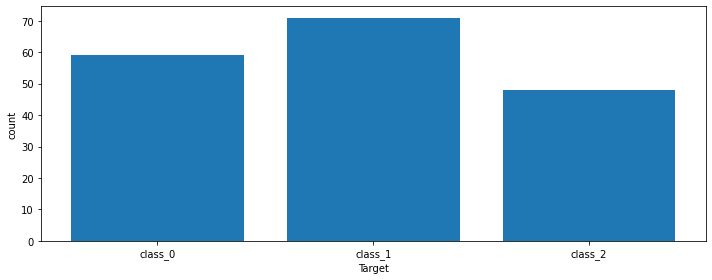

In [6]:
rcParams['figure.figsize'] = 10, 4
plt.bar(wine.target_names, np.unique(Y, return_counts = True)[1])
plt.xlabel('Target')
plt.ylabel('count')
plt.tight_layout()

## Scaling and Train, Test, Valid split

In [7]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
Y = Y[:,np.newaxis]
scaler.mean_

array([1.30006180e+01, 2.33634831e+00, 2.36651685e+00, 1.94949438e+01,
       9.97415730e+01, 2.29511236e+00, 2.02926966e+00, 3.61853933e-01,
       1.59089888e+00, 5.05808988e+00, 9.57449438e-01, 2.61168539e+00,
       7.46893258e+02])

In [8]:
ohe = OneHotEncoder().fit(Y)
Ys = ohe.transform(Y)
Ys.shape

(178, 3)

In [9]:
x_train, x_test,  y_train, y_test  = train_test_split(Xs, Ys, test_size = 0.33)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.5)
print(f'Train = {x_train.shape}, {y_train.shape}')
print(f'Valid = {x_valid.shape}, {y_valid.shape}')
print(f'Test  = {x_test.shape}, {y_test.shape}')

Train = (59, 13), (59, 3)
Valid = (60, 13), (60, 3)
Test  = (59, 13), (59, 3)


## Simple Neural Network

In [10]:
model = Sequential(name="Classifier NN")

model.add(Dense(10, input_dim = Xs.shape[1], name = 'dense1'))
model.add(ReLU())
model.add(Dense(Ys.shape[1], name = 'output'))
model.add(Softmax())

model.summary()

Model: "Classifier NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 10)                140       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 10)                0         
_________________________________________________________________
output (Dense)               (None, 3)                 33        
_________________________________________________________________
softmax_1 (Softmax)          (None, 3)                 0         
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss = CategoricalCrossentropy(), optimizer = SGD(), metrics = ['accuracy'])

In [12]:
log = model.fit(x_train, y_train,
    batch_size = 127,
    epochs = 250,
    verbose = 2,
    validation_data=(x_valid, y_valid)
)

Train on 59 samples, validate on 60 samples
Epoch 1/250
 - 0s - loss: 0.9223 - accuracy: 0.6441 - val_loss: 0.9754 - val_accuracy: 0.4833
Epoch 2/250
 - 0s - loss: 0.9110 - accuracy: 0.6610 - val_loss: 0.9653 - val_accuracy: 0.5333
Epoch 3/250
 - 0s - loss: 0.8999 - accuracy: 0.6610 - val_loss: 0.9554 - val_accuracy: 0.5500
Epoch 4/250
 - 0s - loss: 0.8890 - accuracy: 0.6780 - val_loss: 0.9457 - val_accuracy: 0.5500
Epoch 5/250
 - 0s - loss: 0.8783 - accuracy: 0.6780 - val_loss: 0.9361 - val_accuracy: 0.5667
Epoch 6/250
 - 0s - loss: 0.8678 - accuracy: 0.6780 - val_loss: 0.9266 - val_accuracy: 0.5667
Epoch 7/250
 - 0s - loss: 0.8576 - accuracy: 0.6780 - val_loss: 0.9173 - val_accuracy: 0.5667
Epoch 8/250
 - 0s - loss: 0.8475 - accuracy: 0.6949 - val_loss: 0.9081 - val_accuracy: 0.5833
Epoch 9/250
 - 0s - loss: 0.8375 - accuracy: 0.6949 - val_loss: 0.8990 - val_accuracy: 0.5833
Epoch 10/250
 - 0s - loss: 0.8278 - accuracy: 0.6949 - val_loss: 0.8902 - val_accuracy: 0.6000
Epoch 11/250
 -

Epoch 87/250
 - 0s - loss: 0.4074 - accuracy: 0.9153 - val_loss: 0.5017 - val_accuracy: 0.8833
Epoch 88/250
 - 0s - loss: 0.4045 - accuracy: 0.9153 - val_loss: 0.4989 - val_accuracy: 0.8833
Epoch 89/250
 - 0s - loss: 0.4016 - accuracy: 0.9153 - val_loss: 0.4961 - val_accuracy: 0.8833
Epoch 90/250
 - 0s - loss: 0.3987 - accuracy: 0.9153 - val_loss: 0.4934 - val_accuracy: 0.8833
Epoch 91/250
 - 0s - loss: 0.3959 - accuracy: 0.9153 - val_loss: 0.4907 - val_accuracy: 0.8833
Epoch 92/250
 - 0s - loss: 0.3931 - accuracy: 0.9153 - val_loss: 0.4880 - val_accuracy: 0.8833
Epoch 93/250
 - 0s - loss: 0.3903 - accuracy: 0.9153 - val_loss: 0.4854 - val_accuracy: 0.8833
Epoch 94/250
 - 0s - loss: 0.3877 - accuracy: 0.9153 - val_loss: 0.4828 - val_accuracy: 0.8833
Epoch 95/250
 - 0s - loss: 0.3850 - accuracy: 0.9153 - val_loss: 0.4802 - val_accuracy: 0.8833
Epoch 96/250
 - 0s - loss: 0.3824 - accuracy: 0.9153 - val_loss: 0.4776 - val_accuracy: 0.9000
Epoch 97/250
 - 0s - loss: 0.3798 - accuracy: 0.91

Epoch 173/250
 - 0s - loss: 0.2503 - accuracy: 0.9322 - val_loss: 0.3445 - val_accuracy: 0.9000
Epoch 174/250
 - 0s - loss: 0.2491 - accuracy: 0.9322 - val_loss: 0.3433 - val_accuracy: 0.9000
Epoch 175/250
 - 0s - loss: 0.2479 - accuracy: 0.9322 - val_loss: 0.3420 - val_accuracy: 0.9000
Epoch 176/250
 - 0s - loss: 0.2467 - accuracy: 0.9322 - val_loss: 0.3408 - val_accuracy: 0.9000
Epoch 177/250
 - 0s - loss: 0.2455 - accuracy: 0.9322 - val_loss: 0.3396 - val_accuracy: 0.9000
Epoch 178/250
 - 0s - loss: 0.2443 - accuracy: 0.9322 - val_loss: 0.3384 - val_accuracy: 0.9000
Epoch 179/250
 - 0s - loss: 0.2431 - accuracy: 0.9322 - val_loss: 0.3372 - val_accuracy: 0.9000
Epoch 180/250
 - 0s - loss: 0.2419 - accuracy: 0.9322 - val_loss: 0.3361 - val_accuracy: 0.9000
Epoch 181/250
 - 0s - loss: 0.2408 - accuracy: 0.9322 - val_loss: 0.3349 - val_accuracy: 0.9000
Epoch 182/250
 - 0s - loss: 0.2396 - accuracy: 0.9322 - val_loss: 0.3337 - val_accuracy: 0.9000
Epoch 183/250
 - 0s - loss: 0.2385 - acc

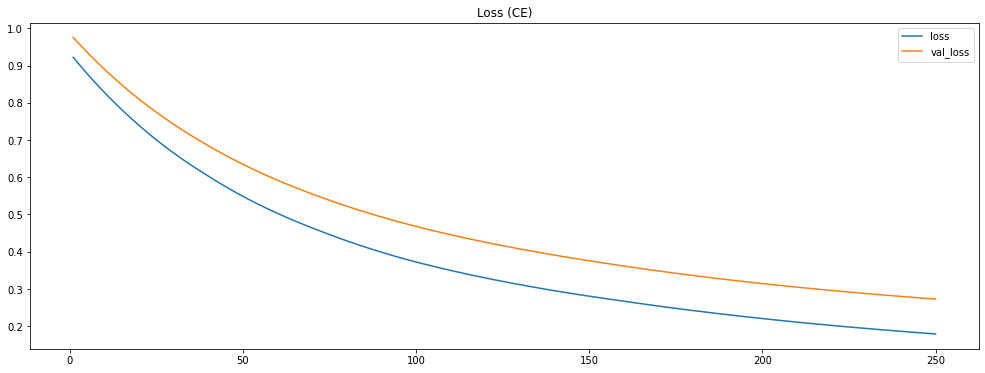

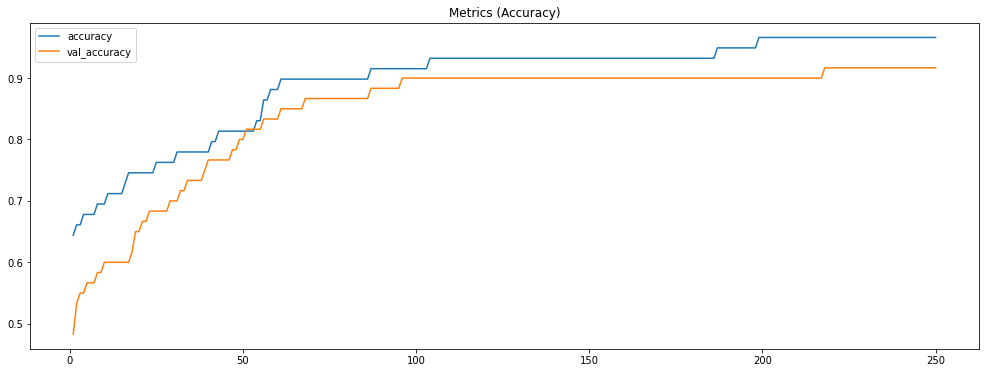

In [13]:
plt.rcParams['figure.figsize'] = (17, 6)
fig, ax1 = plt.subplots()
xepochs = range(1, len(log.history['loss']) + 1)

plt.plot(xepochs, log.history['loss'], label = 'loss')
plt.plot(xepochs, log.history['val_loss'], label = 'val_loss')
plt.title('Loss (CE)')
plt.legend()
plt.show()

plt.plot(xepochs, log.history['accuracy'], label = 'accuracy')
plt.plot(xepochs, log.history['val_accuracy'], label = 'val_accuracy')
plt.title('Metrics (Accuracy)')
plt.legend()
plt.show()

In [14]:
print('Train set:')
print_metrics(ohe.inverse_transform(y_train), model.predict_classes(x_train)[:,np.newaxis])

print()
print('Valid set:')
print_metrics(ohe.inverse_transform(y_valid), model.predict_classes(x_valid)[:,np.newaxis])

print()
print('Test set:')
print_metrics(ohe.inverse_transform(y_test), model.predict_classes(x_test)[:,np.newaxis])

Train set:
Accuracy : 0.97
Precision: 0.96
Recall   : 0.97
F1-score : 0.97

Valid set:
Accuracy : 0.92
Precision: 0.93
Recall   : 0.92
F1-score : 0.92

Test set:
Accuracy : 0.98
Precision: 0.99
Recall   : 0.98
F1-score : 0.98


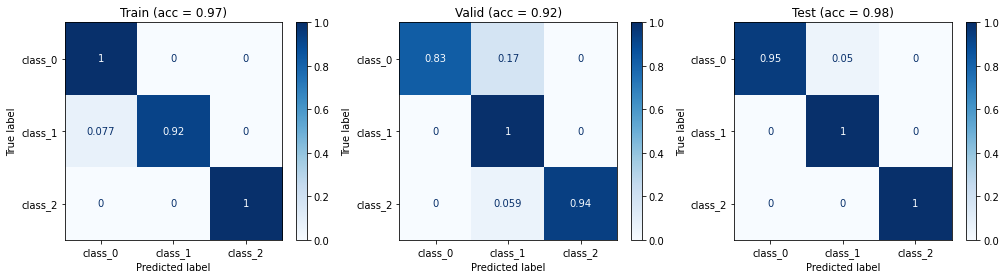

In [17]:
def print_conf_matrix(y_true, y_pred, labels, ax, title):
    disp = ConfusionMatrixDisplay(
        confusion_matrix = confusion_matrix(y_true, y_pred, normalize = 'true'), display_labels = labels)
    disp.plot(include_values = True, cmap = plt.cm.Blues, ax = ax)
    ax.set_title(f'{title} (acc = {accuracy_score(y_true, y_pred):.2f})')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 4))
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_train)), 
                  model.predict_classes(x_train), wine.target_names, ax1, 'Train')
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_valid)), 
                  model.predict_classes(x_valid), wine.target_names, ax2, 'Valid')
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_test)), 
                  model.predict_classes(x_test), wine.target_names, ax3, 'Test')

plt.show()

## Increase complexity

In [18]:
model = Sequential(name="Classifier NN")

model.add(Dense(10, input_dim = X.shape[1], name = 'dense1'))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(GaussianNoise(0.1))
model.add(Dense(10, name = 'dense2'))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(GaussianNoise(0.1))
model.add(Dense(Ys.shape[1], name = 'output'))
model.add(Softmax())

model.summary()

Model: "Classifier NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 10)                140       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 10)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 10)                0         
_________________________________________________________________
dense2 (Dense)               (None, 10)                110       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 10)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)              

In [19]:
model.compile(loss = CategoricalCrossentropy(), optimizer = SGD(), metrics = ['accuracy'])

In [20]:
log = model.fit(x_train, y_train,
    batch_size = 32,
    epochs = 1000,
    verbose = 2,
    validation_data=(x_valid, y_valid)
)

Train on 59 samples, validate on 60 samples
Epoch 1/1000
 - 0s - loss: 2.0967 - accuracy: 0.3390 - val_loss: 1.4760 - val_accuracy: 0.2500
Epoch 2/1000
 - 0s - loss: 1.8483 - accuracy: 0.2712 - val_loss: 1.3763 - val_accuracy: 0.2667
Epoch 3/1000
 - 0s - loss: 1.8612 - accuracy: 0.2712 - val_loss: 1.3141 - val_accuracy: 0.3500
Epoch 4/1000
 - 0s - loss: 1.5645 - accuracy: 0.3559 - val_loss: 1.2631 - val_accuracy: 0.3833
Epoch 5/1000
 - 0s - loss: 1.6255 - accuracy: 0.4068 - val_loss: 1.2245 - val_accuracy: 0.3833
Epoch 6/1000
 - 0s - loss: 1.5624 - accuracy: 0.4237 - val_loss: 1.1851 - val_accuracy: 0.3833
Epoch 7/1000
 - 0s - loss: 1.7343 - accuracy: 0.3390 - val_loss: 1.1529 - val_accuracy: 0.4000
Epoch 8/1000
 - 0s - loss: 1.7490 - accuracy: 0.2542 - val_loss: 1.1074 - val_accuracy: 0.4500
Epoch 9/1000
 - 0s - loss: 1.5132 - accuracy: 0.2881 - val_loss: 1.0776 - val_accuracy: 0.4667
Epoch 10/1000
 - 0s - loss: 1.6453 - accuracy: 0.3220 - val_loss: 1.0468 - val_accuracy: 0.4833
Epoch

Epoch 86/1000
 - 0s - loss: 0.7766 - accuracy: 0.6610 - val_loss: 0.5934 - val_accuracy: 0.8833
Epoch 87/1000
 - 0s - loss: 0.7820 - accuracy: 0.6102 - val_loss: 0.5896 - val_accuracy: 0.8833
Epoch 88/1000
 - 0s - loss: 0.8400 - accuracy: 0.6102 - val_loss: 0.5873 - val_accuracy: 0.8833
Epoch 89/1000
 - 0s - loss: 0.8238 - accuracy: 0.5763 - val_loss: 0.5854 - val_accuracy: 0.8833
Epoch 90/1000
 - 0s - loss: 0.8812 - accuracy: 0.5424 - val_loss: 0.5842 - val_accuracy: 0.8833
Epoch 91/1000
 - 0s - loss: 0.7222 - accuracy: 0.5932 - val_loss: 0.5823 - val_accuracy: 0.8833
Epoch 92/1000
 - 0s - loss: 0.6997 - accuracy: 0.6610 - val_loss: 0.5810 - val_accuracy: 0.8833
Epoch 93/1000
 - 0s - loss: 0.7236 - accuracy: 0.6949 - val_loss: 0.5792 - val_accuracy: 0.8833
Epoch 94/1000
 - 0s - loss: 0.8439 - accuracy: 0.5424 - val_loss: 0.5783 - val_accuracy: 0.9000
Epoch 95/1000
 - 0s - loss: 0.8233 - accuracy: 0.5932 - val_loss: 0.5770 - val_accuracy: 0.9000
Epoch 96/1000
 - 0s - loss: 0.8687 - acc

Epoch 171/1000
 - 0s - loss: 0.5921 - accuracy: 0.7966 - val_loss: 0.4399 - val_accuracy: 0.9000
Epoch 172/1000
 - 0s - loss: 0.5748 - accuracy: 0.7119 - val_loss: 0.4376 - val_accuracy: 0.9000
Epoch 173/1000
 - 0s - loss: 0.7015 - accuracy: 0.6780 - val_loss: 0.4357 - val_accuracy: 0.9000
Epoch 174/1000
 - 0s - loss: 0.6611 - accuracy: 0.7288 - val_loss: 0.4343 - val_accuracy: 0.9000
Epoch 175/1000
 - 0s - loss: 0.5387 - accuracy: 0.7797 - val_loss: 0.4323 - val_accuracy: 0.9000
Epoch 176/1000
 - 0s - loss: 0.5111 - accuracy: 0.7797 - val_loss: 0.4299 - val_accuracy: 0.9000
Epoch 177/1000
 - 0s - loss: 0.6560 - accuracy: 0.7288 - val_loss: 0.4284 - val_accuracy: 0.9000
Epoch 178/1000
 - 0s - loss: 0.5702 - accuracy: 0.6949 - val_loss: 0.4273 - val_accuracy: 0.9000
Epoch 179/1000
 - 0s - loss: 0.5993 - accuracy: 0.7797 - val_loss: 0.4254 - val_accuracy: 0.9000
Epoch 180/1000
 - 0s - loss: 0.6928 - accuracy: 0.6610 - val_loss: 0.4232 - val_accuracy: 0.9000
Epoch 181/1000
 - 0s - loss: 0

Epoch 256/1000
 - 0s - loss: 0.5596 - accuracy: 0.7966 - val_loss: 0.3320 - val_accuracy: 0.9000
Epoch 257/1000
 - 0s - loss: 0.5634 - accuracy: 0.7797 - val_loss: 0.3308 - val_accuracy: 0.9000
Epoch 258/1000
 - 0s - loss: 0.5374 - accuracy: 0.8136 - val_loss: 0.3300 - val_accuracy: 0.9000
Epoch 259/1000
 - 0s - loss: 0.5233 - accuracy: 0.7627 - val_loss: 0.3299 - val_accuracy: 0.9000
Epoch 260/1000
 - 0s - loss: 0.4566 - accuracy: 0.8136 - val_loss: 0.3285 - val_accuracy: 0.9000
Epoch 261/1000
 - 0s - loss: 0.4324 - accuracy: 0.7797 - val_loss: 0.3271 - val_accuracy: 0.9000
Epoch 262/1000
 - 0s - loss: 0.5012 - accuracy: 0.7627 - val_loss: 0.3260 - val_accuracy: 0.9000
Epoch 263/1000
 - 0s - loss: 0.5389 - accuracy: 0.6949 - val_loss: 0.3247 - val_accuracy: 0.9000
Epoch 264/1000
 - 0s - loss: 0.5245 - accuracy: 0.7119 - val_loss: 0.3237 - val_accuracy: 0.9000
Epoch 265/1000
 - 0s - loss: 0.4453 - accuracy: 0.8136 - val_loss: 0.3224 - val_accuracy: 0.9000
Epoch 266/1000
 - 0s - loss: 0

Epoch 341/1000
 - 0s - loss: 0.4151 - accuracy: 0.8136 - val_loss: 0.2593 - val_accuracy: 0.9000
Epoch 342/1000
 - 0s - loss: 0.3246 - accuracy: 0.9322 - val_loss: 0.2583 - val_accuracy: 0.9000
Epoch 343/1000
 - 0s - loss: 0.3719 - accuracy: 0.8644 - val_loss: 0.2577 - val_accuracy: 0.9000
Epoch 344/1000
 - 0s - loss: 0.4198 - accuracy: 0.8136 - val_loss: 0.2575 - val_accuracy: 0.9000
Epoch 345/1000
 - 0s - loss: 0.3670 - accuracy: 0.8644 - val_loss: 0.2566 - val_accuracy: 0.9000
Epoch 346/1000
 - 0s - loss: 0.4692 - accuracy: 0.7797 - val_loss: 0.2566 - val_accuracy: 0.9000
Epoch 347/1000
 - 0s - loss: 0.4107 - accuracy: 0.8644 - val_loss: 0.2558 - val_accuracy: 0.9000
Epoch 348/1000
 - 0s - loss: 0.3368 - accuracy: 0.8983 - val_loss: 0.2548 - val_accuracy: 0.9000
Epoch 349/1000
 - 0s - loss: 0.4462 - accuracy: 0.8136 - val_loss: 0.2545 - val_accuracy: 0.9000
Epoch 350/1000
 - 0s - loss: 0.3954 - accuracy: 0.8136 - val_loss: 0.2541 - val_accuracy: 0.9000
Epoch 351/1000
 - 0s - loss: 0

Epoch 426/1000
 - 0s - loss: 0.3027 - accuracy: 0.8814 - val_loss: 0.2198 - val_accuracy: 0.9167
Epoch 427/1000
 - 0s - loss: 0.2645 - accuracy: 0.9153 - val_loss: 0.2193 - val_accuracy: 0.9167
Epoch 428/1000
 - 0s - loss: 0.4339 - accuracy: 0.8136 - val_loss: 0.2190 - val_accuracy: 0.9167
Epoch 429/1000
 - 0s - loss: 0.3688 - accuracy: 0.8644 - val_loss: 0.2186 - val_accuracy: 0.9167
Epoch 430/1000
 - 0s - loss: 0.2933 - accuracy: 0.8983 - val_loss: 0.2178 - val_accuracy: 0.9167
Epoch 431/1000
 - 0s - loss: 0.3757 - accuracy: 0.8475 - val_loss: 0.2177 - val_accuracy: 0.9167
Epoch 432/1000
 - 0s - loss: 0.3670 - accuracy: 0.8475 - val_loss: 0.2172 - val_accuracy: 0.9167
Epoch 433/1000
 - 0s - loss: 0.3626 - accuracy: 0.8475 - val_loss: 0.2168 - val_accuracy: 0.9167
Epoch 434/1000
 - 0s - loss: 0.3482 - accuracy: 0.8475 - val_loss: 0.2160 - val_accuracy: 0.9167
Epoch 435/1000
 - 0s - loss: 0.3979 - accuracy: 0.7966 - val_loss: 0.2154 - val_accuracy: 0.9167
Epoch 436/1000
 - 0s - loss: 0

Epoch 511/1000
 - 0s - loss: 0.3226 - accuracy: 0.9153 - val_loss: 0.1916 - val_accuracy: 0.9333
Epoch 512/1000
 - 0s - loss: 0.2740 - accuracy: 0.9153 - val_loss: 0.1912 - val_accuracy: 0.9333
Epoch 513/1000
 - 0s - loss: 0.2761 - accuracy: 0.9322 - val_loss: 0.1909 - val_accuracy: 0.9333
Epoch 514/1000
 - 0s - loss: 0.3736 - accuracy: 0.8305 - val_loss: 0.1905 - val_accuracy: 0.9333
Epoch 515/1000
 - 0s - loss: 0.2384 - accuracy: 0.9322 - val_loss: 0.1897 - val_accuracy: 0.9333
Epoch 516/1000
 - 0s - loss: 0.3612 - accuracy: 0.8305 - val_loss: 0.1892 - val_accuracy: 0.9333
Epoch 517/1000
 - 0s - loss: 0.2290 - accuracy: 0.8983 - val_loss: 0.1888 - val_accuracy: 0.9333
Epoch 518/1000
 - 0s - loss: 0.3054 - accuracy: 0.8814 - val_loss: 0.1883 - val_accuracy: 0.9333
Epoch 519/1000
 - 0s - loss: 0.4016 - accuracy: 0.8475 - val_loss: 0.1881 - val_accuracy: 0.9333
Epoch 520/1000
 - 0s - loss: 0.2733 - accuracy: 0.8814 - val_loss: 0.1879 - val_accuracy: 0.9333
Epoch 521/1000
 - 0s - loss: 0

Epoch 596/1000
 - 0s - loss: 0.2501 - accuracy: 0.9322 - val_loss: 0.1735 - val_accuracy: 0.9333
Epoch 597/1000
 - 0s - loss: 0.3698 - accuracy: 0.8644 - val_loss: 0.1733 - val_accuracy: 0.9333
Epoch 598/1000
 - 0s - loss: 0.2881 - accuracy: 0.8644 - val_loss: 0.1729 - val_accuracy: 0.9333
Epoch 599/1000
 - 0s - loss: 0.3806 - accuracy: 0.8136 - val_loss: 0.1728 - val_accuracy: 0.9333
Epoch 600/1000
 - 0s - loss: 0.1653 - accuracy: 0.9322 - val_loss: 0.1726 - val_accuracy: 0.9333
Epoch 601/1000
 - 0s - loss: 0.2620 - accuracy: 0.8814 - val_loss: 0.1727 - val_accuracy: 0.9333
Epoch 602/1000
 - 0s - loss: 0.3155 - accuracy: 0.8814 - val_loss: 0.1720 - val_accuracy: 0.9333
Epoch 603/1000
 - 0s - loss: 0.3398 - accuracy: 0.8644 - val_loss: 0.1717 - val_accuracy: 0.9333
Epoch 604/1000
 - 0s - loss: 0.3211 - accuracy: 0.8814 - val_loss: 0.1717 - val_accuracy: 0.9333
Epoch 605/1000
 - 0s - loss: 0.2318 - accuracy: 0.8983 - val_loss: 0.1716 - val_accuracy: 0.9333
Epoch 606/1000
 - 0s - loss: 0

Epoch 681/1000
 - 0s - loss: 0.3902 - accuracy: 0.8475 - val_loss: 0.1617 - val_accuracy: 0.9333
Epoch 682/1000
 - 0s - loss: 0.2509 - accuracy: 0.8814 - val_loss: 0.1617 - val_accuracy: 0.9333
Epoch 683/1000
 - 0s - loss: 0.2483 - accuracy: 0.8814 - val_loss: 0.1614 - val_accuracy: 0.9333
Epoch 684/1000
 - 0s - loss: 0.3624 - accuracy: 0.8305 - val_loss: 0.1616 - val_accuracy: 0.9333
Epoch 685/1000
 - 0s - loss: 0.3480 - accuracy: 0.8305 - val_loss: 0.1615 - val_accuracy: 0.9333
Epoch 686/1000
 - 0s - loss: 0.2332 - accuracy: 0.9492 - val_loss: 0.1613 - val_accuracy: 0.9333
Epoch 687/1000
 - 0s - loss: 0.2608 - accuracy: 0.8983 - val_loss: 0.1613 - val_accuracy: 0.9333
Epoch 688/1000
 - 0s - loss: 0.3034 - accuracy: 0.8475 - val_loss: 0.1612 - val_accuracy: 0.9333
Epoch 689/1000
 - 0s - loss: 0.3244 - accuracy: 0.8475 - val_loss: 0.1611 - val_accuracy: 0.9333
Epoch 690/1000
 - 0s - loss: 0.2303 - accuracy: 0.8814 - val_loss: 0.1608 - val_accuracy: 0.9333
Epoch 691/1000
 - 0s - loss: 0

Epoch 766/1000
 - 0s - loss: 0.2455 - accuracy: 0.8814 - val_loss: 0.1496 - val_accuracy: 0.9500
Epoch 767/1000
 - 0s - loss: 0.2931 - accuracy: 0.8475 - val_loss: 0.1498 - val_accuracy: 0.9500
Epoch 768/1000
 - 0s - loss: 0.2471 - accuracy: 0.9492 - val_loss: 0.1497 - val_accuracy: 0.9500
Epoch 769/1000
 - 0s - loss: 0.3518 - accuracy: 0.8475 - val_loss: 0.1498 - val_accuracy: 0.9500
Epoch 770/1000
 - 0s - loss: 0.1774 - accuracy: 0.9153 - val_loss: 0.1499 - val_accuracy: 0.9500
Epoch 771/1000
 - 0s - loss: 0.3286 - accuracy: 0.8475 - val_loss: 0.1498 - val_accuracy: 0.9500
Epoch 772/1000
 - 0s - loss: 0.3120 - accuracy: 0.8644 - val_loss: 0.1501 - val_accuracy: 0.9500
Epoch 773/1000
 - 0s - loss: 0.3209 - accuracy: 0.8644 - val_loss: 0.1501 - val_accuracy: 0.9500
Epoch 774/1000
 - 0s - loss: 0.2526 - accuracy: 0.8814 - val_loss: 0.1504 - val_accuracy: 0.9500
Epoch 775/1000
 - 0s - loss: 0.1686 - accuracy: 0.9322 - val_loss: 0.1503 - val_accuracy: 0.9500
Epoch 776/1000
 - 0s - loss: 0

Epoch 851/1000
 - 0s - loss: 0.3001 - accuracy: 0.8644 - val_loss: 0.1456 - val_accuracy: 0.9500
Epoch 852/1000
 - 0s - loss: 0.2903 - accuracy: 0.8305 - val_loss: 0.1456 - val_accuracy: 0.9500
Epoch 853/1000
 - 0s - loss: 0.2656 - accuracy: 0.8983 - val_loss: 0.1454 - val_accuracy: 0.9500
Epoch 854/1000
 - 0s - loss: 0.2814 - accuracy: 0.8983 - val_loss: 0.1452 - val_accuracy: 0.9500
Epoch 855/1000
 - 0s - loss: 0.2537 - accuracy: 0.8983 - val_loss: 0.1451 - val_accuracy: 0.9500
Epoch 856/1000
 - 0s - loss: 0.1776 - accuracy: 0.9322 - val_loss: 0.1450 - val_accuracy: 0.9500
Epoch 857/1000
 - 0s - loss: 0.2256 - accuracy: 0.8475 - val_loss: 0.1450 - val_accuracy: 0.9500
Epoch 858/1000
 - 0s - loss: 0.2078 - accuracy: 0.9322 - val_loss: 0.1449 - val_accuracy: 0.9500
Epoch 859/1000
 - 0s - loss: 0.3163 - accuracy: 0.8814 - val_loss: 0.1446 - val_accuracy: 0.9500
Epoch 860/1000
 - 0s - loss: 0.1105 - accuracy: 0.9492 - val_loss: 0.1445 - val_accuracy: 0.9500
Epoch 861/1000
 - 0s - loss: 0

Epoch 936/1000
 - 0s - loss: 0.1370 - accuracy: 0.9322 - val_loss: 0.1415 - val_accuracy: 0.9500
Epoch 937/1000
 - 0s - loss: 0.1945 - accuracy: 0.9153 - val_loss: 0.1416 - val_accuracy: 0.9500
Epoch 938/1000
 - 0s - loss: 0.1980 - accuracy: 0.8983 - val_loss: 0.1414 - val_accuracy: 0.9500
Epoch 939/1000
 - 0s - loss: 0.1855 - accuracy: 0.9322 - val_loss: 0.1412 - val_accuracy: 0.9500
Epoch 940/1000
 - 0s - loss: 0.2289 - accuracy: 0.9153 - val_loss: 0.1418 - val_accuracy: 0.9500
Epoch 941/1000
 - 0s - loss: 0.1458 - accuracy: 0.9661 - val_loss: 0.1416 - val_accuracy: 0.9500
Epoch 942/1000
 - 0s - loss: 0.2553 - accuracy: 0.9153 - val_loss: 0.1414 - val_accuracy: 0.9500
Epoch 943/1000
 - 0s - loss: 0.2630 - accuracy: 0.9153 - val_loss: 0.1411 - val_accuracy: 0.9500
Epoch 944/1000
 - 0s - loss: 0.1910 - accuracy: 0.9322 - val_loss: 0.1410 - val_accuracy: 0.9500
Epoch 945/1000
 - 0s - loss: 0.2511 - accuracy: 0.8644 - val_loss: 0.1408 - val_accuracy: 0.9500
Epoch 946/1000
 - 0s - loss: 0

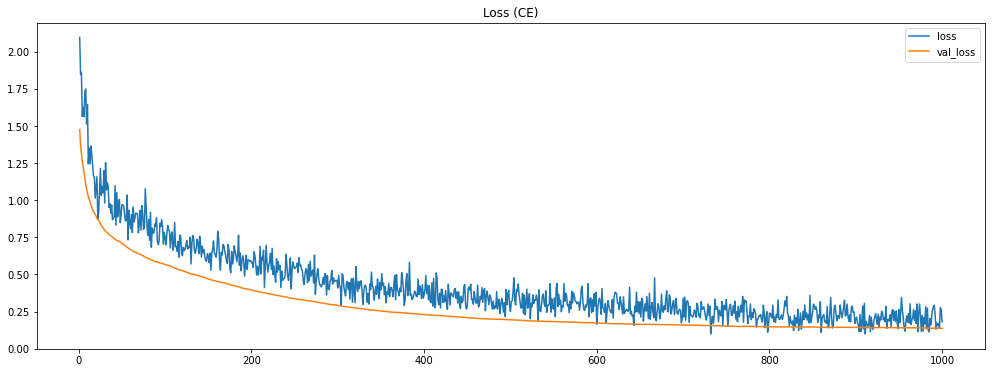

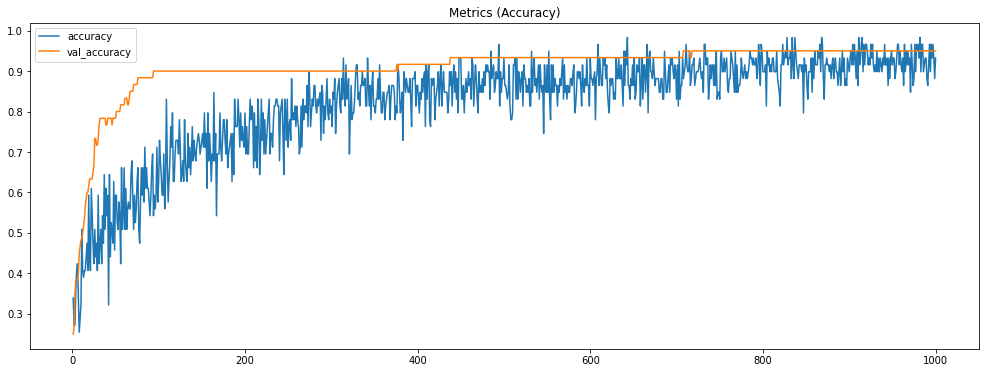

In [21]:
plt.rcParams['figure.figsize'] = (17, 6)
fig, ax1 = plt.subplots()
xepochs = range(1, len(log.history['loss']) + 1)

plt.plot(xepochs, log.history['loss'], label = 'loss')
plt.plot(xepochs, log.history['val_loss'], label = 'val_loss')
plt.title('Loss (CE)')
plt.legend()
plt.show()

plt.plot(xepochs, log.history['accuracy'], label = 'accuracy')
plt.plot(xepochs, log.history['val_accuracy'], label = 'val_accuracy')
plt.title('Metrics (Accuracy)')
plt.legend()
plt.show()

In [22]:
print('Train set:')
print_metrics(ohe.inverse_transform(y_train), model.predict_classes(x_train)[:,np.newaxis])

print()
print('Valid set:')
print_metrics(ohe.inverse_transform(y_valid), model.predict_classes(x_valid)[:,np.newaxis])

print()
print('Test set:')
print_metrics(ohe.inverse_transform(y_test), model.predict_classes(x_test)[:,np.newaxis])

Train set:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1-score : 1.00

Valid set:
Accuracy : 0.95
Precision: 0.95
Recall   : 0.95
F1-score : 0.95

Test set:
Accuracy : 0.97
Precision: 0.96
Recall   : 0.97
F1-score : 0.97


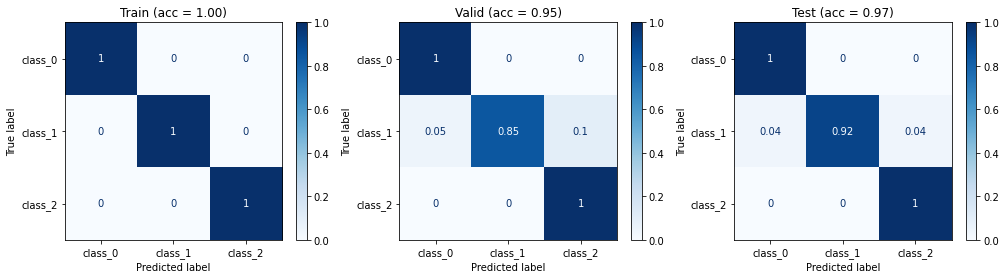

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 4))
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_train)), 
                  model.predict_classes(x_train), wine.target_names, ax1, 'Train')
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_valid)), 
                  model.predict_classes(x_valid), wine.target_names, ax2, 'Valid')
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_test)), 
                  model.predict_classes(x_test), wine.target_names, ax3, 'Test')
plt.show()

## Early stop

In [24]:
model = Sequential(name="Classifier NN")

model.add(Dense(10, input_dim = X.shape[1], name = 'dense1'))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(GaussianNoise(0.1))
model.add(Dense(10, name = 'dense2'))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(GaussianNoise(0.1))
model.add(Dense(Ys.shape[1], name = 'output'))
model.add(Softmax())

model.summary()

Model: "Classifier NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 10)                140       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 10)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
gaussian_noise_3 (GaussianNo (None, 10)                0         
_________________________________________________________________
dense2 (Dense)               (None, 10)                110       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 10)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)              

In [25]:
model.compile(loss = CategoricalCrossentropy(), optimizer = SGD(), metrics = ['accuracy'])
es = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 50, verbose = 1, restore_best_weights = True)

In [26]:
log = model.fit(x_train, y_train,
    batch_size = 32,
    epochs = 10000,
    verbose = 2,
    validation_data=(x_valid, y_valid),
    callbacks = [ es ]
)

Train on 59 samples, validate on 60 samples
Epoch 1/10000
 - 0s - loss: 1.4382 - accuracy: 0.4407 - val_loss: 1.2419 - val_accuracy: 0.3667
Epoch 2/10000
 - 0s - loss: 1.4595 - accuracy: 0.3729 - val_loss: 1.2066 - val_accuracy: 0.3667
Epoch 3/10000
 - 0s - loss: 1.3795 - accuracy: 0.4746 - val_loss: 1.1677 - val_accuracy: 0.3833
Epoch 4/10000
 - 0s - loss: 1.2547 - accuracy: 0.5254 - val_loss: 1.1454 - val_accuracy: 0.3833
Epoch 5/10000
 - 0s - loss: 1.4849 - accuracy: 0.4068 - val_loss: 1.1161 - val_accuracy: 0.4000
Epoch 6/10000
 - 0s - loss: 1.2673 - accuracy: 0.4407 - val_loss: 1.0970 - val_accuracy: 0.4000
Epoch 7/10000
 - 0s - loss: 1.0163 - accuracy: 0.5424 - val_loss: 1.0828 - val_accuracy: 0.4000
Epoch 8/10000
 - 0s - loss: 1.3570 - accuracy: 0.4407 - val_loss: 1.0539 - val_accuracy: 0.4000
Epoch 9/10000
 - 0s - loss: 1.6323 - accuracy: 0.3390 - val_loss: 1.0229 - val_accuracy: 0.4000
Epoch 10/10000
 - 0s - loss: 1.3449 - accuracy: 0.3390 - val_loss: 1.0030 - val_accuracy: 0.

 - 0s - loss: 0.6281 - accuracy: 0.7288 - val_loss: 0.5193 - val_accuracy: 0.8333
Epoch 86/10000
 - 0s - loss: 0.5322 - accuracy: 0.8475 - val_loss: 0.5167 - val_accuracy: 0.8333
Epoch 87/10000
 - 0s - loss: 0.6984 - accuracy: 0.6949 - val_loss: 0.5149 - val_accuracy: 0.8333
Epoch 88/10000
 - 0s - loss: 0.5532 - accuracy: 0.7627 - val_loss: 0.5127 - val_accuracy: 0.8333
Epoch 89/10000
 - 0s - loss: 0.7156 - accuracy: 0.6102 - val_loss: 0.5102 - val_accuracy: 0.8333
Epoch 90/10000
 - 0s - loss: 0.6268 - accuracy: 0.6780 - val_loss: 0.5081 - val_accuracy: 0.8333
Epoch 91/10000
 - 0s - loss: 0.5763 - accuracy: 0.7458 - val_loss: 0.5055 - val_accuracy: 0.8333
Epoch 92/10000
 - 0s - loss: 0.7003 - accuracy: 0.7288 - val_loss: 0.5034 - val_accuracy: 0.8333
Epoch 93/10000
 - 0s - loss: 0.5637 - accuracy: 0.7627 - val_loss: 0.5016 - val_accuracy: 0.8333
Epoch 94/10000
 - 0s - loss: 0.6986 - accuracy: 0.6949 - val_loss: 0.5006 - val_accuracy: 0.8333
Epoch 95/10000
 - 0s - loss: 0.6136 - accurac

Epoch 169/10000
 - 0s - loss: 0.7449 - accuracy: 0.6610 - val_loss: 0.3812 - val_accuracy: 0.8500
Epoch 170/10000
 - 0s - loss: 0.6011 - accuracy: 0.6780 - val_loss: 0.3808 - val_accuracy: 0.8500
Epoch 171/10000
 - 0s - loss: 0.5744 - accuracy: 0.7458 - val_loss: 0.3784 - val_accuracy: 0.8500
Epoch 172/10000
 - 0s - loss: 0.5264 - accuracy: 0.7288 - val_loss: 0.3774 - val_accuracy: 0.8500
Epoch 173/10000
 - 0s - loss: 0.3826 - accuracy: 0.8475 - val_loss: 0.3758 - val_accuracy: 0.8500
Epoch 174/10000
 - 0s - loss: 0.5229 - accuracy: 0.7458 - val_loss: 0.3745 - val_accuracy: 0.8500
Epoch 175/10000
 - 0s - loss: 0.5969 - accuracy: 0.7458 - val_loss: 0.3739 - val_accuracy: 0.8500
Epoch 176/10000
 - 0s - loss: 0.5566 - accuracy: 0.7797 - val_loss: 0.3728 - val_accuracy: 0.8500
Epoch 177/10000
 - 0s - loss: 0.7171 - accuracy: 0.6441 - val_loss: 0.3720 - val_accuracy: 0.8500
Epoch 178/10000
 - 0s - loss: 0.5360 - accuracy: 0.7458 - val_loss: 0.3708 - val_accuracy: 0.8500
Epoch 179/10000
 - 0

Epoch 253/10000
 - 0s - loss: 0.5038 - accuracy: 0.7797 - val_loss: 0.2956 - val_accuracy: 0.8833
Epoch 254/10000
 - 0s - loss: 0.4527 - accuracy: 0.7797 - val_loss: 0.2945 - val_accuracy: 0.8833
Epoch 255/10000
 - 0s - loss: 0.4851 - accuracy: 0.7797 - val_loss: 0.2934 - val_accuracy: 0.8833
Epoch 256/10000
 - 0s - loss: 0.4482 - accuracy: 0.8305 - val_loss: 0.2931 - val_accuracy: 0.8833
Epoch 257/10000
 - 0s - loss: 0.6143 - accuracy: 0.7458 - val_loss: 0.2926 - val_accuracy: 0.8833
Epoch 258/10000
 - 0s - loss: 0.4657 - accuracy: 0.7966 - val_loss: 0.2917 - val_accuracy: 0.8833
Epoch 259/10000
 - 0s - loss: 0.6365 - accuracy: 0.7288 - val_loss: 0.2920 - val_accuracy: 0.8833
Epoch 260/10000
 - 0s - loss: 0.4803 - accuracy: 0.7966 - val_loss: 0.2914 - val_accuracy: 0.8833
Epoch 261/10000
 - 0s - loss: 0.4513 - accuracy: 0.8136 - val_loss: 0.2902 - val_accuracy: 0.8833
Epoch 262/10000
 - 0s - loss: 0.3606 - accuracy: 0.8814 - val_loss: 0.2895 - val_accuracy: 0.8833
Epoch 263/10000
 - 0

Epoch 337/10000
 - 0s - loss: 0.5323 - accuracy: 0.7627 - val_loss: 0.2404 - val_accuracy: 0.9000
Epoch 338/10000
 - 0s - loss: 0.3935 - accuracy: 0.8136 - val_loss: 0.2403 - val_accuracy: 0.9000
Epoch 339/10000
 - 0s - loss: 0.4862 - accuracy: 0.7458 - val_loss: 0.2399 - val_accuracy: 0.9000
Epoch 340/10000
 - 0s - loss: 0.4771 - accuracy: 0.7288 - val_loss: 0.2390 - val_accuracy: 0.9167
Epoch 341/10000
 - 0s - loss: 0.3340 - accuracy: 0.9322 - val_loss: 0.2387 - val_accuracy: 0.9167
Epoch 342/10000
 - 0s - loss: 0.3060 - accuracy: 0.8814 - val_loss: 0.2384 - val_accuracy: 0.9167
Epoch 343/10000
 - 0s - loss: 0.3129 - accuracy: 0.9153 - val_loss: 0.2378 - val_accuracy: 0.9167
Epoch 344/10000
 - 0s - loss: 0.3786 - accuracy: 0.7966 - val_loss: 0.2374 - val_accuracy: 0.9167
Epoch 345/10000
 - 0s - loss: 0.3466 - accuracy: 0.8814 - val_loss: 0.2370 - val_accuracy: 0.9167
Epoch 346/10000
 - 0s - loss: 0.4301 - accuracy: 0.7966 - val_loss: 0.2365 - val_accuracy: 0.9000
Epoch 347/10000
 - 0

Epoch 421/10000
 - 0s - loss: 0.2324 - accuracy: 0.9153 - val_loss: 0.2032 - val_accuracy: 0.9167
Epoch 422/10000
 - 0s - loss: 0.4014 - accuracy: 0.8136 - val_loss: 0.2024 - val_accuracy: 0.9167
Epoch 423/10000
 - 0s - loss: 0.3039 - accuracy: 0.8475 - val_loss: 0.2023 - val_accuracy: 0.9167
Epoch 424/10000
 - 0s - loss: 0.3143 - accuracy: 0.8814 - val_loss: 0.2020 - val_accuracy: 0.9167
Epoch 425/10000
 - 0s - loss: 0.2922 - accuracy: 0.9153 - val_loss: 0.2014 - val_accuracy: 0.9167
Epoch 426/10000
 - 0s - loss: 0.2958 - accuracy: 0.8814 - val_loss: 0.2011 - val_accuracy: 0.9167
Epoch 427/10000
 - 0s - loss: 0.3417 - accuracy: 0.8983 - val_loss: 0.2006 - val_accuracy: 0.9167
Epoch 428/10000
 - 0s - loss: 0.2657 - accuracy: 0.8983 - val_loss: 0.2001 - val_accuracy: 0.9167
Epoch 429/10000
 - 0s - loss: 0.2994 - accuracy: 0.8814 - val_loss: 0.1994 - val_accuracy: 0.9167
Epoch 430/10000
 - 0s - loss: 0.4122 - accuracy: 0.7966 - val_loss: 0.1994 - val_accuracy: 0.9167
Epoch 431/10000
 - 0

Epoch 505/10000
 - 0s - loss: 0.3031 - accuracy: 0.8983 - val_loss: 0.1791 - val_accuracy: 0.9333
Epoch 506/10000
 - 0s - loss: 0.2726 - accuracy: 0.8983 - val_loss: 0.1787 - val_accuracy: 0.9333
Epoch 507/10000
 - 0s - loss: 0.2221 - accuracy: 0.9661 - val_loss: 0.1788 - val_accuracy: 0.9333
Epoch 508/10000
 - 0s - loss: 0.3020 - accuracy: 0.8983 - val_loss: 0.1788 - val_accuracy: 0.9333
Epoch 509/10000
 - 0s - loss: 0.2530 - accuracy: 0.9492 - val_loss: 0.1791 - val_accuracy: 0.9333
Epoch 510/10000
 - 0s - loss: 0.1825 - accuracy: 0.9661 - val_loss: 0.1792 - val_accuracy: 0.9333
Epoch 511/10000
 - 0s - loss: 0.2979 - accuracy: 0.8814 - val_loss: 0.1790 - val_accuracy: 0.9333
Epoch 512/10000
 - 0s - loss: 0.3037 - accuracy: 0.8814 - val_loss: 0.1786 - val_accuracy: 0.9333
Epoch 513/10000
 - 0s - loss: 0.2346 - accuracy: 0.9492 - val_loss: 0.1784 - val_accuracy: 0.9333
Epoch 514/10000
 - 0s - loss: 0.4230 - accuracy: 0.8305 - val_loss: 0.1785 - val_accuracy: 0.9333
Epoch 515/10000
 - 0

Epoch 589/10000
 - 0s - loss: 0.2665 - accuracy: 0.9322 - val_loss: 0.1675 - val_accuracy: 0.9333
Epoch 590/10000
 - 0s - loss: 0.2372 - accuracy: 0.9492 - val_loss: 0.1675 - val_accuracy: 0.9333
Epoch 591/10000
 - 0s - loss: 0.3027 - accuracy: 0.8983 - val_loss: 0.1673 - val_accuracy: 0.9333
Epoch 592/10000
 - 0s - loss: 0.1901 - accuracy: 0.9661 - val_loss: 0.1672 - val_accuracy: 0.9333
Epoch 593/10000
 - 0s - loss: 0.3042 - accuracy: 0.8644 - val_loss: 0.1674 - val_accuracy: 0.9333
Epoch 594/10000
 - 0s - loss: 0.2056 - accuracy: 0.9661 - val_loss: 0.1673 - val_accuracy: 0.9333
Epoch 595/10000
 - 0s - loss: 0.3343 - accuracy: 0.8305 - val_loss: 0.1673 - val_accuracy: 0.9333
Epoch 596/10000
 - 0s - loss: 0.2811 - accuracy: 0.8644 - val_loss: 0.1672 - val_accuracy: 0.9333
Epoch 597/10000
 - 0s - loss: 0.3240 - accuracy: 0.8475 - val_loss: 0.1671 - val_accuracy: 0.9333
Epoch 598/10000
 - 0s - loss: 0.3292 - accuracy: 0.8136 - val_loss: 0.1669 - val_accuracy: 0.9167
Epoch 599/10000
 - 0

Epoch 673/10000
 - 0s - loss: 0.3816 - accuracy: 0.8305 - val_loss: 0.1603 - val_accuracy: 0.9333
Epoch 674/10000
 - 0s - loss: 0.3304 - accuracy: 0.8644 - val_loss: 0.1598 - val_accuracy: 0.9333
Epoch 675/10000
 - 0s - loss: 0.2966 - accuracy: 0.8814 - val_loss: 0.1593 - val_accuracy: 0.9333
Epoch 676/10000
 - 0s - loss: 0.2729 - accuracy: 0.9153 - val_loss: 0.1587 - val_accuracy: 0.9333
Epoch 677/10000
 - 0s - loss: 0.2455 - accuracy: 0.8814 - val_loss: 0.1584 - val_accuracy: 0.9333
Epoch 678/10000
 - 0s - loss: 0.2872 - accuracy: 0.8983 - val_loss: 0.1590 - val_accuracy: 0.9333
Epoch 679/10000
 - 0s - loss: 0.2818 - accuracy: 0.8814 - val_loss: 0.1587 - val_accuracy: 0.9500
Epoch 680/10000
 - 0s - loss: 0.2061 - accuracy: 0.8983 - val_loss: 0.1581 - val_accuracy: 0.9500
Epoch 681/10000
 - 0s - loss: 0.1615 - accuracy: 0.9661 - val_loss: 0.1580 - val_accuracy: 0.9500
Epoch 682/10000
 - 0s - loss: 0.2221 - accuracy: 0.9322 - val_loss: 0.1577 - val_accuracy: 0.9500
Epoch 683/10000
 - 0

Epoch 757/10000
 - 0s - loss: 0.1840 - accuracy: 0.9492 - val_loss: 0.1563 - val_accuracy: 0.9333
Epoch 758/10000
 - 0s - loss: 0.1515 - accuracy: 0.9492 - val_loss: 0.1563 - val_accuracy: 0.9333
Epoch 759/10000
 - 0s - loss: 0.2708 - accuracy: 0.9153 - val_loss: 0.1559 - val_accuracy: 0.9500
Epoch 760/10000
 - 0s - loss: 0.2215 - accuracy: 0.9322 - val_loss: 0.1556 - val_accuracy: 0.9500
Epoch 761/10000
 - 0s - loss: 0.2152 - accuracy: 0.9153 - val_loss: 0.1556 - val_accuracy: 0.9500
Epoch 762/10000
 - 0s - loss: 0.1220 - accuracy: 0.9661 - val_loss: 0.1559 - val_accuracy: 0.9500
Epoch 763/10000
 - 0s - loss: 0.1291 - accuracy: 0.9661 - val_loss: 0.1557 - val_accuracy: 0.9500
Epoch 764/10000
 - 0s - loss: 0.1904 - accuracy: 0.9322 - val_loss: 0.1556 - val_accuracy: 0.9500
Epoch 765/10000
 - 0s - loss: 0.2620 - accuracy: 0.8983 - val_loss: 0.1558 - val_accuracy: 0.9500
Epoch 766/10000
 - 0s - loss: 0.2372 - accuracy: 0.8814 - val_loss: 0.1559 - val_accuracy: 0.9500
Epoch 767/10000
 - 0

Epoch 841/10000
 - 0s - loss: 0.2485 - accuracy: 0.8644 - val_loss: 0.1536 - val_accuracy: 0.9500
Epoch 842/10000
 - 0s - loss: 0.2032 - accuracy: 0.8983 - val_loss: 0.1533 - val_accuracy: 0.9500
Epoch 843/10000
 - 0s - loss: 0.1264 - accuracy: 0.9661 - val_loss: 0.1534 - val_accuracy: 0.9500
Epoch 844/10000
 - 0s - loss: 0.2196 - accuracy: 0.9153 - val_loss: 0.1533 - val_accuracy: 0.9500
Epoch 845/10000
 - 0s - loss: 0.2106 - accuracy: 0.9322 - val_loss: 0.1530 - val_accuracy: 0.9500
Epoch 846/10000
 - 0s - loss: 0.3530 - accuracy: 0.7966 - val_loss: 0.1530 - val_accuracy: 0.9500
Epoch 847/10000
 - 0s - loss: 0.1778 - accuracy: 0.9322 - val_loss: 0.1529 - val_accuracy: 0.9500
Epoch 848/10000
 - 0s - loss: 0.1792 - accuracy: 0.9322 - val_loss: 0.1528 - val_accuracy: 0.9500
Epoch 849/10000
 - 0s - loss: 0.2114 - accuracy: 0.9661 - val_loss: 0.1531 - val_accuracy: 0.9500
Epoch 850/10000
 - 0s - loss: 0.2603 - accuracy: 0.9153 - val_loss: 0.1521 - val_accuracy: 0.9500
Epoch 851/10000
 - 0

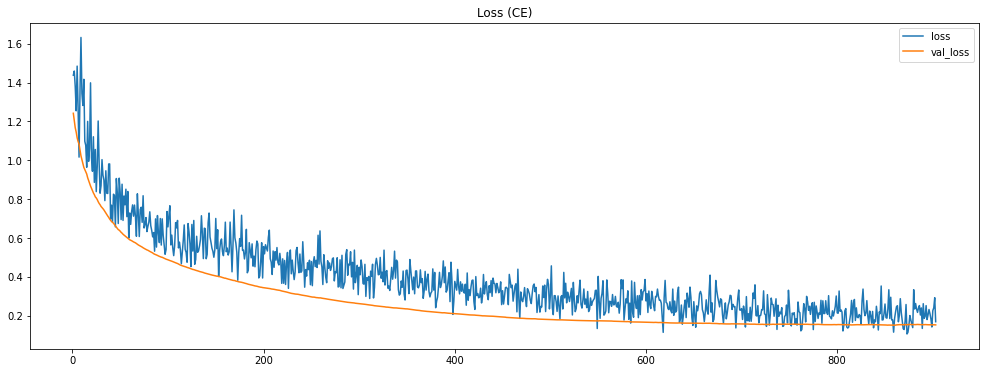

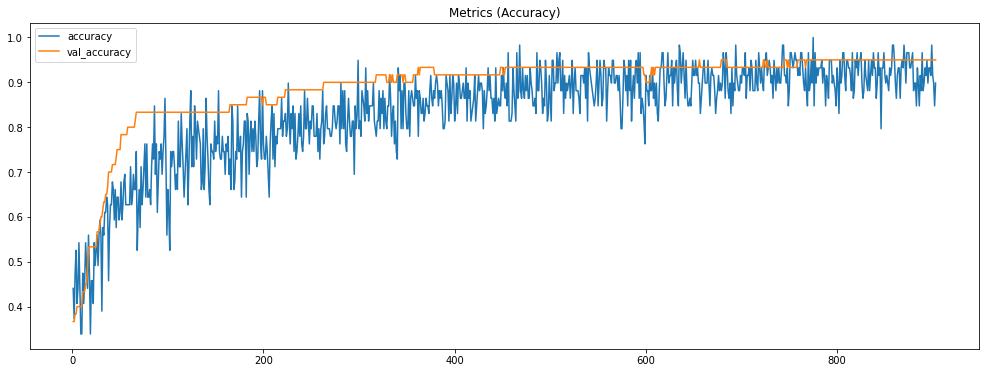

In [27]:
plt.rcParams['figure.figsize'] = (17, 6)
fig, ax1 = plt.subplots()
xepochs = range(1, len(log.history['loss']) + 1)

plt.plot(xepochs, log.history['loss'], label = 'loss')
plt.plot(xepochs, log.history['val_loss'], label = 'val_loss')
plt.title('Loss (CE)')
plt.legend()
plt.show()

plt.plot(xepochs, log.history['accuracy'], label = 'accuracy')
plt.plot(xepochs, log.history['val_accuracy'], label = 'val_accuracy')
plt.title('Metrics (Accuracy)')
plt.legend()
plt.show()

In [28]:
print('Train set:')
print_metrics(ohe.inverse_transform(y_train), model.predict_classes(x_train)[:,np.newaxis])

print()
print('Valid set:')
print_metrics(ohe.inverse_transform(y_valid), model.predict_classes(x_valid)[:,np.newaxis])

print()
print('Test set:')
print_metrics(ohe.inverse_transform(y_test), model.predict_classes(x_test)[:,np.newaxis])

Train set:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1-score : 1.00

Valid set:
Accuracy : 0.95
Precision: 0.96
Recall   : 0.95
F1-score : 0.95

Test set:
Accuracy : 0.95
Precision: 0.95
Recall   : 0.96
F1-score : 0.95


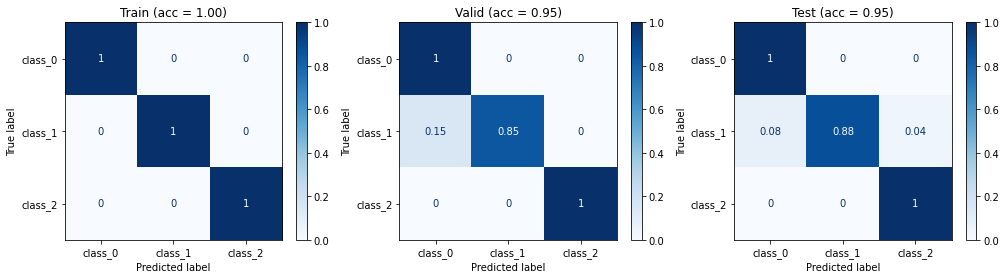

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 4))
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_train)), 
                  model.predict_classes(x_train), wine.target_names, ax1, 'Train')
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_valid)), 
                  model.predict_classes(x_valid), wine.target_names, ax2, 'Valid')
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_test)), 
                  model.predict_classes(x_test), wine.target_names, ax3, 'Test')
plt.show()